# MNIST dataset classification
- Sem Kieboom
- Abel van Dijk
- Mark Hendrikx
- Luuk Kessels

In dit document, wordt de MNIST dataset geclassificeerd met behulp van verschillende machine learning modellen.




### Imports en setup

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
# Load dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

## Verkenning en datavoorbereiding
De data bestaat uit 1797 samples van 8x8 pixels. De target is een getal van 0 tot 9. De data is al in een goede vorm voor machine learning, dus er hoeft niet veel aan gedaan te worden. Ook is er geen sprake van missende data. Ook lijkt de verdeling van de data goed, alle getallen komen ongeveer even vaak voor (9.68% - 10.18%).


In [2]:
print("Num of images, and num of pixels: "+ str(X.shape))
print("Y values: "+str({int(i) for i in set(y)}))
# check how many of each number there are in the dataset in percentages
for i in range(10):
    print(f"{i}: {np.round(len(y[y == i]) / len(y) * 100, 2)}%")


Num of images, and num of pixels: (1797, 64)
Y values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
0: 9.91%
1: 10.13%
2: 9.85%
3: 10.18%
4: 10.07%
5: 10.13%
6: 10.07%
7: 9.96%
8: 9.68%
9: 10.02%


AttributeError: describe

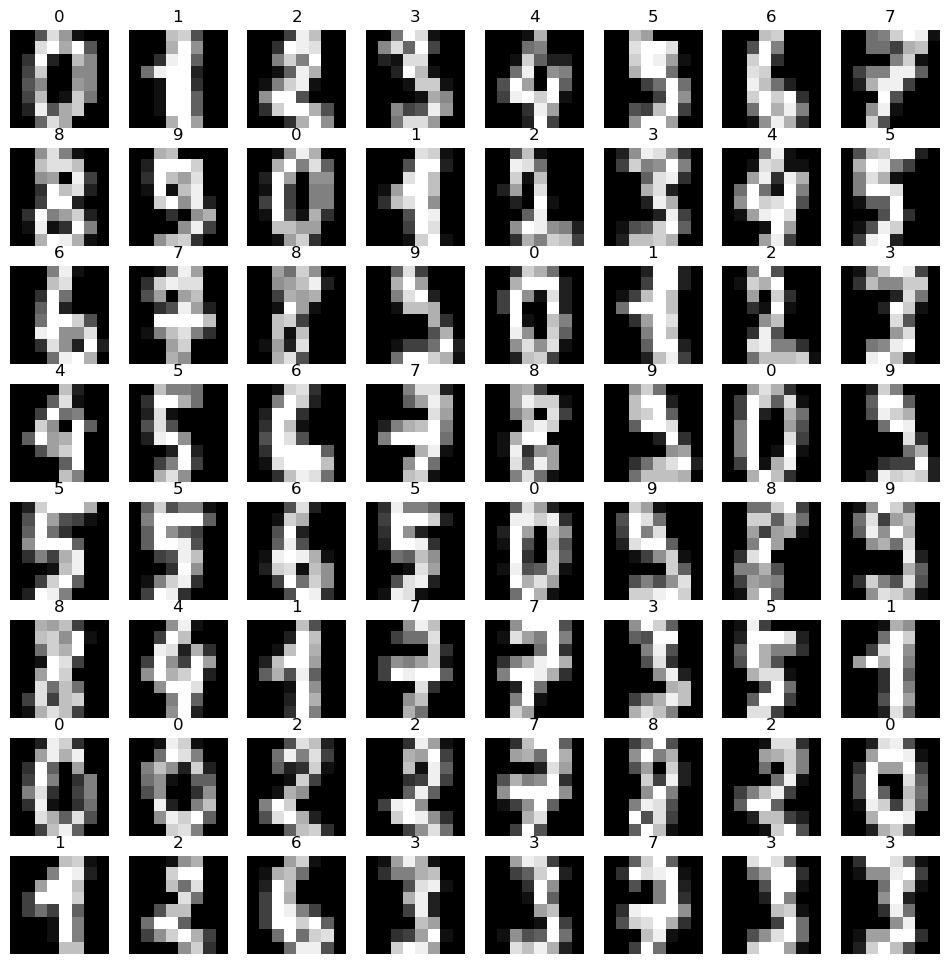

X contains None values:  False
y contains None values:  False
X Contains 0 values:  False


In [181]:
# show the first 64 images with their labels
plt.figure(figsize=(12, 12))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(y[i])
    plt.axis('off')
plt.show()

print("X contains None values: ", (X == None).all())
print("y contains None values: ", (y == None).all())
print("X Contains 0 values: ", (X == 0).all())

models = []

## Modelkeuze en implementatie
Voor het trainen van een model, is het belangrijk om de data te splitsen in een train en test set. Dit zorgt ervoor dat het model niet overfit op de data.

### Random forest classifier

In [182]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# model
rnd_forest_model = RandomForestClassifier()

# training
rnd_forest_model.fit(x_train, y_train)

# predict
y_pred_reg = rnd_forest_model.predict(x_test)

# accuracy_score
accuracy_score(y_test, y_pred_reg)
print(accuracy_score(y_test, y_pred_reg))

# show the accuracy score of the train set
print("Accuracy on training set: ", rnd_forest_model.score(x_train, y_train))

# confusion_matrix
confusion_matrix(y_test, y_pred_reg)

models.append(rnd_forest_model)


0.9777777777777777
Accuracy on training set:  1.0


### Logistic regression classifier


In [183]:
log_regression_model = LogisticRegression(max_iter=5000)

log_regression_model.fit(x_train, y_train)

y_pred_lr = log_regression_model.predict(x_test)

accuracy_score(y_test, y_pred_lr)


confusion_matrix(y_test, y_pred_lr)

models.append(log_regression_model)

### K-nearest neighbors classifier

In [184]:
k_nearest_model = KNeighborsClassifier()

k_nearest_model.fit(x_train, y_train)

y_pred_k = k_nearest_model.predict(x_test)

accuracy_score(y_test, y_pred_k)

confusion_matrix(y_test, y_pred_k)

models.append(k_nearest_model)

### Testen op eigen data
We hebben zelf een aantal afbeeldingen gemaakt van de cijfers 0 tot 9. Deze afbeeldingen zijn 16x16 pixels groot en zijn in het zwart-wit. We hebben deze afbeeldingen omgezet naar 8x8 pixels, een numpy array en deze genormaliseerd naar een schaal van 0 tot 16. Ook hebben we de afbeeldingen omgedraaid, omdat de MNIST dataset de afbeeldingen in de dataset ook omgedraaid heeft. Met eigen data, lijkt de K-nearest neighbour classifier het beste te presteren, gevolgd door de Logistic regression. De Random forest classifier presteert het slechtst.

Model: RandomForestClassifier() Prediction: [4]
Model: RandomForestClassifier() Prediction: [4]
Model: RandomForestClassifier() Prediction: [4]
Model: RandomForestClassifier() Prediction: [4]
Model: RandomForestClassifier() Prediction: [4]
Model: RandomForestClassifier() Prediction: [7]
Model: RandomForestClassifier() Prediction: [4]
Model: RandomForestClassifier() Prediction: [4]
Model: RandomForestClassifier() Prediction: [4]
Model: RandomForestClassifier() Prediction: [7]
Model: RandomForestClassifier() Correct: 1/10

Model: LogisticRegression(max_iter=5000) Prediction: [0]
Model: LogisticRegression(max_iter=5000) Prediction: [1]
Model: LogisticRegression(max_iter=5000) Prediction: [1]
Model: LogisticRegression(max_iter=5000) Prediction: [3]
Model: LogisticRegression(max_iter=5000) Prediction: [6]
Model: LogisticRegression(max_iter=5000) Prediction: [3]
Model: LogisticRegression(max_iter=5000) Prediction: [6]
Model: LogisticRegression(max_iter=5000) Prediction: [9]
Model: LogisticRe

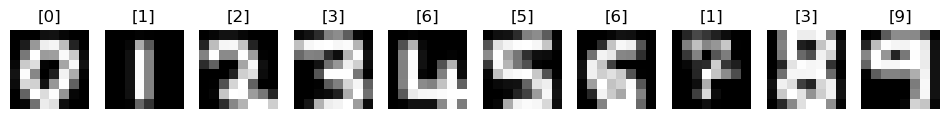

In [185]:
images = []
for i in range(10):
    image = Image.open(f'{i}.png').convert('L')
    image = image.resize((8, 8))  # Resize to 8x8 pixels
    image_array = np.array(image).reshape(1, 64)
    # normalize the 0-255 valules to 0-16
    image_array = image_array / 16
    # flip the image to match the MNIST dataset
    image_array = 1 - image_array
    images.append(image_array)

for model in models:
    correct = 0
    for i in range(10):
        print(f"Model: {model} Prediction: {model.predict(images[i])}")
        if model.predict(images[i]) == i:
            correct += 1
    print(f"Model: {model} Correct: {correct}/10")
    print()
    correct = 0

print("K-nearest model predictions:")
plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[i].reshape(8, 8), cmap='gray')
    plt.title(k_nearest_model.predict(images[i]))
    plt.axis('off')


## Model evaluatie


## Optimalisatie en verbeteringen

## Explainable AI (XAI) analyse

## Conlusie en reflectie